# Tarea 3: Construir y Evaluar Modelos

## Importar Librerias 

In [140]:
import sys
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns 
import scipy
from math import sqrt
import matplotlib as mpl
import matplotlib.pyplot as plt
#from ggplot import *
%matplotlib inline

#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model 
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
#import graphviz

#model metrics
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

#cross validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

#get your parameters right
from sklearn.model_selection import GridSearchCV

## Cargar los datos

In [11]:
df = pd.io.parsers.read_csv("/Users/ariasrodriguez/Documents/GitHub/Data_Analytics-Big_Data/default of credit card clients.csv", header =0) 
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


### Identificar estructura y tipo de datos 

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

#### Descripción de variables categóricas

In [13]:
df[['SEX', 'EDUCATION', 'MARRIAGE']].describe()

,SEX,EDUCATION,MARRIAGE
count,30000.000000,30000.000000,30000.000000
mean,1.603733,1.853133,1.551867
std,0.489129,0.790349,0.521970
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,2.000000,2.000000,2.000000
max,2.000000,6.000000,3.000000


###### No hay datos faltantes, pero existen algunas inconsistencias.
###### Educación contiene 6 tipos de datos de los cuales 0, 5 y 6 que no están identificadas, ni documentadas.
###### Matrimonio tiene una etiqueta 0 que no está documentada.

### Descripción del retraso de pago

In [14]:
df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


##### Todos presentan una etiqueta indocumentada -2. 
##### 1,2,3 son los meses de retraso
##### -1 debería etiquetarse como 'pagar debidamente'
##### Cada valor negativo debería verse como un -1 o 0. 

### Descripción del estado de cuenta

In [15]:
df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


##### Es importante determinar si los números negativos representan un valor en el crédito

### Descripción del pago anterior

In [16]:
df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


##### Los valores no presentan ningun valor fuera de lo normal 

### Monto del crédito otorgado

In [17]:
df.LIMIT_BAL.describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

##### Tiene valores con un rango es muy amplio.

#### Cambiar el nombre de las columnas default payment next month y PAY_0

In [18]:
df = df.rename(columns={'default payment next month': 'DEF_PAY', 'PAY_0': 'PAY_1'})
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEF_PAY
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


#### Probabilidad predeterminada

In [19]:
df.DEF_PAY.sum() / len(df.DEF_PAY)

0.2212

#### Otras formas de obtener este tipo de números 

In [20]:
print(df.shape)
print(df.shape[0])
print(df.DEF_PAY.count())
print(len(df.axes[1]))

(30000, 25)
30000
30000
25


#### Seleccione la variable dependiente

In [21]:
y = df['DEF_PAY'].copy()
y.sample(5)

27987    1
20615    0
2740     0
28541    0
7357     1
Name: DEF_PAY, dtype: int64

#### Seleccione las características

In [22]:
features = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
X = df[features].copy()
X.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

#### Conjunto de entrenamiento y prueba para las variables 'X' & 'Y'

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [92]:
X_train_count = len(X_train.index)
X_test_count = len(X_test.index)
print('The number of observations in the X training set are:',str(X_train_count),'and X test are:',str(X_test_count))

The number of observations in the X training set are: 24000 and X test are: 6000


In [93]:
y_train_count = len(y_train.index)
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:',str(y_train_count),'and Y test are:',str(y_test_count))

The number of observations in the Y training set are: 24000 and Y test are: 6000


##### Entrenaremos el 70% de los datos y probaremos en el 30% restante.

#### Verifiquemos que el objetivo no esté lejos

In [26]:
print(df.DEF_PAY.describe())
print("---------------------------")
print(y_train.describe())
print("---------------------------")
print(y_test.describe())

count    30000.000000
mean         0.221200
std          0.415062
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: DEF_PAY, dtype: float64
---------------------------
count    21000.000000
mean         0.222667
std          0.416046
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: DEF_PAY, dtype: float64
---------------------------
count    9000.000000
mean        0.217778
std         0.412758
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: DEF_PAY, dtype: float64


#### Crear el Clasificador

In [27]:
classifier = DecisionTreeClassifier(max_depth=10, random_state=14)

#### Entrenar al clasificador

In [28]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=14, splitter='best')

#### Ejecutar predicciones en la prueba

In [29]:
predictions = classifier.predict(X_test)

#### Resultado de las pruebas

In [30]:
accuracy_score(y_true = y_test, y_pred = predictions)

0.8078888888888889

##### El resultado es bueno, el 80,78888888888889 % 
##### Es importante mensionar que es un resultado obtenido de una selección aleatoria de los parámetros. 

In [31]:
classifier = DecisionTreeClassifier(max_depth=100, random_state=14) 
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
accuracy_score(y_true = y_test, y_pred = predictions)

0.7268888888888889

#### Definir la cuadrícula de parámetros

In [32]:
param_grid = {'max_depth': np.arange(3, 10),
             'criterion' : ['gini','entropy'],
             'max_leaf_nodes': [5,10,20,100],
             'min_samples_split': [2, 5, 10, 20]}

#### Crear la cuadrícula

In [33]:
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5, scoring= 'accuracy')

##### La opción cv estará clara en algunas celdas

#### Entrenar 

In [34]:
grid_tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

#### Veamos el mejor estimador

In [35]:
print(grid_tree.best_estimator_)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=20,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


#### Puntaje

In [36]:
print(np.abs(grid_tree.best_score_))

0.8200000000000001


In [37]:
classifier = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=20,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
accuracy_score(y_true = y_test, y_pred = predictions)

0.8192222222222222

##### Bueno en este caso el resultado fue bueno, con una precisión de + 0.07% al elegir los parámetros correctos.
##### Es importante realizar una validación cruzada. 

In [38]:
kf = KFold(n_splits=5,random_state=42,shuffle=True)

fold = []
scr = []

for i,(train_index, test_index) in enumerate(kf.split(df)):
    training = df.iloc[train_index,:]
    valid = df.iloc[test_index,:]
    feats = training[features] #definido anteriormente
    label = training['DEF_PAY']
    valid_feats = valid[features]
    valid_label = valid['DEF_PAY']
    classifier.fit(feats,label) #es el último que corremos, el mejor
    pred = classifier.predict(valid_feats)
    score = accuracy_score(y_true = valid_label, y_pred = pred)
    fold.append(i+1)
    scr.append(score)
    

#### Dataframe con las puntuaciones

In [39]:
performance = pd.DataFrame({'Score':scr,'Fold':fold})

#### Veamos los resultados 

In [40]:
performance

,Score,Fold
0,0.8210,1
1,0.8210,2
2,0.8275,3
3,0.8165,4
4,0.8155,5


##### Es importante mencionar que dependiendo cómo dividimos el dataframe de entrenamiento y puebas, obtenemos una precisión entre 0.816 y 0.8275

In [41]:
def get_feature_importance(clsf, ftrs):
    imp = clsf.feature_importances_.tolist()
    feat = ftrs
    result = pd.DataFrame({'feat':feat,'score':imp})
    result = result.sort_values(by=['score'],ascending=False)
    return result

get_feature_importance(classifier, features)

,feat,score
5,PAY_1,0.722666
6,PAY_2,0.145870
19,PAY_AMT3,0.049608
11,BILL_AMT1,0.024832
7,PAY_3,0.021724
10,PAY_6,0.018298
2,EDUCATION,0.006637
0,LIMIT_BAL,0.003905
8,PAY_4,0.003220
18,PAY_AMT2,0.002195


##### Podemos ver que las variables PAY_1 se asignan a un cliente específico y además es realmente  importante.

#### Entrenar la variable PAY_1

In [42]:
X = df[['PAY_1']].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
classifier.fit(X_train, y_train) #mismo clasificador que antes
predictions = classifier.predict(X_test)
accuracy_score(y_true = y_test, y_pred = predictions)

0.8193333333333334

##### Si el 30% de los clientes predeterminados, hacemos un modelo que solo asigna 0 a def_pay, en realidad obtengo un 70% de precisión. 
##### La precisión puede ser una métrica engañosa.

### Exploración de datos.

#### Variables categóricas

In [50]:
df.SEX.value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

##### Más mujeres que hombres

In [51]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [52]:
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

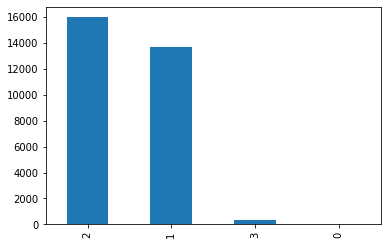

In [53]:
df.MARRIAGE.value_counts().plot(kind = 'bar')

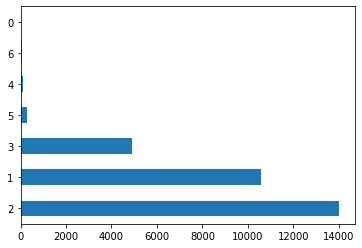

In [54]:
df.EDUCATION.value_counts().plot(kind = "barh")

##### Podriamos aplicar limpieza en algunas categorías que no tienen relevancia en el dataframe

#### Variables numéricas

In [55]:
def draw_histograms(df, variables, n_rows, n_cols, n_bins):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=n_bins,ax=ax)
        ax.set_title(var_name)
    fig.tight_layout()  # Mejora un poco la apariencia.
    plt.show()

##### Verificar si tienen sentido, la presencia de valores atípicos

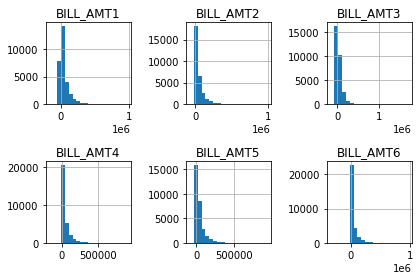

In [56]:
bills = df[['BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]
draw_histograms(bills, bills.columns, 2, 3, 20)

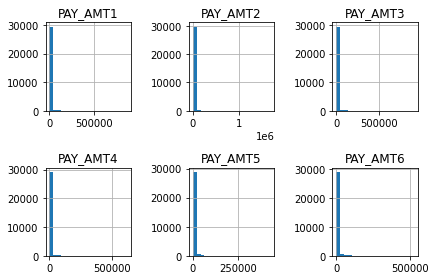

In [57]:
pay = df[['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
draw_histograms(pay, pay.columns, 2, 3, 20)

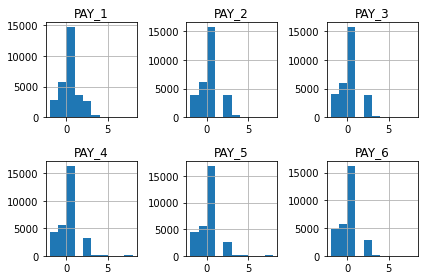

In [58]:
late = df[['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
draw_histograms(late, late.columns, 2, 3, 10)

##### Más de una categoría para las variables PAY

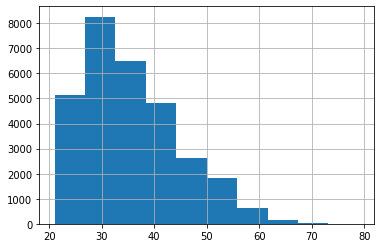

In [59]:
df.AGE.hist()

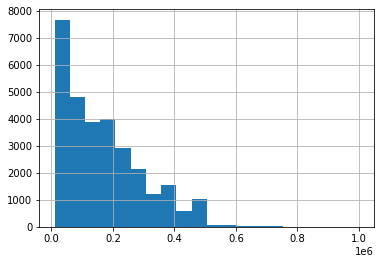

In [60]:
df.LIMIT_BAL.hist(bins = 20)

##### En las cantidades de dinero tienen un rango muy grandes, lo que es un problema  para modelos como el de regresión lineal

### Limpieza de datos

#### El 0 en MATRIMONIO podemos clasificarlo como 'Otro' #3.
#### Los 0 (indocumentados), 5 y 6 (etiqueta desconocida) en EDUCACIÓN podemos ponerlo en una categoría 'Otro' #4.

In [61]:
fil = (df.EDUCATION == 5) | (df.EDUCATION == 6) | (df.EDUCATION == 0)
df.loc[fil, 'EDUCATION'] = 4
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [62]:
df.loc[df.MARRIAGE == 0, 'MARRIAGE'] = 3
df.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

#### Las variables PAY_n indican la cantidad de meses de retraso e indican "pagar debidamente" con -1. 
#### Entonces -2, 0 pueden ajustarse a 0 como "pagarla debidamente".

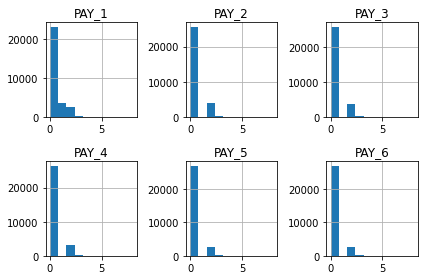

In [63]:
fil = (df.PAY_1 == -2) | (df.PAY_1 == -1) | (df.PAY_1 == 0)
df.loc[fil, 'PAY_1'] = 0
fil = (df.PAY_2 == -2) | (df.PAY_2 == -1) | (df.PAY_2 == 0)
df.loc[fil, 'PAY_2'] = 0
fil = (df.PAY_3 == -2) | (df.PAY_3 == -1) | (df.PAY_3 == 0)
df.loc[fil, 'PAY_3'] = 0
fil = (df.PAY_4 == -2) | (df.PAY_4 == -1) | (df.PAY_4 == 0)
df.loc[fil, 'PAY_4'] = 0
fil = (df.PAY_5 == -2) | (df.PAY_5 == -1) | (df.PAY_5 == 0)
df.loc[fil, 'PAY_5'] = 0
fil = (df.PAY_6 == -2) | (df.PAY_6 == -1) | (df.PAY_6 == 0)
df.loc[fil, 'PAY_6'] = 0
late = df[['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
draw_histograms(late, late.columns, 2, 3, 10)

#### Indetifiquemos valores atipicos en PAY_AMT1 / PAY_AMT2

In [64]:
df[df.PAY_AMT1 > 300000][['LIMIT_BAL', 'PAY_1', 'PAY_2', 'BILL_AMT2', 
                          'PAY_AMT1', 'BILL_AMT1', 'DEF_PAY']]

,LIMIT_BAL,PAY_1,PAY_2,BILL_AMT2,PAY_AMT1,BILL_AMT1,DEF_PAY
2687,500000,0,0,367979,368199,71921,0
5687,480000,0,0,400000,302000,106660,0
8500,400000,0,0,405016,405016,6500,0
12330,300000,1,0,324392,505000,-165580,0
25431,170000,0,0,167941,304815,30860,0
28003,510000,0,0,481382,493358,71121,0
28716,340000,0,0,176743,873552,139808,0
29820,400000,1,0,394858,423903,396343,0
29867,340000,0,0,331641,300039,44855,0
29963,610000,0,0,322228,323014,348392,0


In [66]:
df[df.PAY_AMT2 > 300000][['LIMIT_BAL', 'PAY_2', 'PAY_3', 'BILL_AMT3', 
                          'PAY_AMT2', 'BILL_AMT2', 'DEF_PAY']]

,LIMIT_BAL,PAY_2,PAY_3,BILL_AMT3,PAY_AMT2,BILL_AMT2,DEF_PAY
2592,480000,0,0,339176,344261,38929,0
3774,500000,0,0,301441,302961,39356,0
5296,500000,0,0,1664089,1684259,-18088,0
5400,500000,0,0,385228,385228,8970,0
6150,300000,0,0,4735,344467,-5973,1
6864,500000,0,0,444462,300018,201402,0
9044,500000,0,0,384973,384986,24201,0
11568,430000,0,0,354716,358689,960,1
11853,360000,1,0,338600,361560,-22960,0
12829,340000,0,0,330510,312723,335584,1


##### Podemos determinar que talvez no son valores atípicos, sino simplemente clientes con mucho dinero.

In [67]:
df.groupby(['SEX', 'DEF_PAY']).size()

SEX  DEF_PAY
1    0           9015
     1           2873
2    0          14349
     1           3763
dtype: int64

In [68]:
genero = df.groupby(['SEX', 'DEF_PAY']).size().unstack(1)
genero

DEF_PAY,0,1
SEX,,
1,9015,2873
2,14349,3763


In [69]:
pd.crosstab(df.SEX, df.DEF_PAY)

DEF_PAY,0,1
SEX,,
1,9015,2873
2,14349,3763


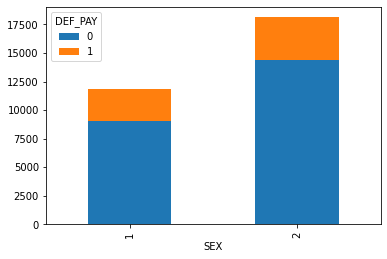

In [70]:
genero.plot(kind='bar', stacked = True)

In [72]:
genero['perc'] = (genero[1]/(genero[0] + genero[1])) 
#esto crea una nueva columna en nuestro conjunto de datos
genero

DEF_PAY,0,1,perc
SEX,,,
1,9015,2873,0.241672
2,14349,3763,0.207763


In [73]:
df[["SEX", "DEF_PAY"]].groupby(['SEX'], as_index=False).mean().sort_values(by='DEF_PAY', ascending=False)

,SEX,DEF_PAY
0,1,0.241672
1,2,0.207763


##### Podemos ver más mujeres que hombres
##### los hombres tiene mayor probabilidad de incumplir el próximo mes

In [74]:
def corr_2_cols(Col1, Col2):
    res = df.groupby([Col1, Col2]).size().unstack()
    res['perc'] = (res[res.columns[1]]/(res[res.columns[0]] + res[res.columns[1]]))
    return res

In [75]:
corr_2_cols('EDUCATION', 'DEF_PAY')

DEF_PAY,0,1,perc
EDUCATION,,,
1,8549,2036,0.192348
2,10700,3330,0.237349
3,3680,1237,0.251576
4,435,33,0.070513


##### A simple vista podemos ver que a mayor es la educación, menor es la probabilidad de incumplimiento el próximo mes. 

In [77]:
corr_2_cols('MARRIAGE', 'DEF_PAY')

DEF_PAY,0,1,perc
MARRIAGE,,,
1,10453,3206,0.234717
2,12623,3341,0.209283
3,288,89,0.236074


##### La personas casadas tienen más probabilidades de incumplimiento.

In [78]:
corr_2_cols('MARRIAGE', 'SEX')

SEX,1,2,perc
MARRIAGE,,,
1,5190,8469,0.620031
2,6553,9411,0.589514
3,145,232,0.615385


In [79]:
corr_2_cols('EDUCATION', 'SEX')

SEX,1,2,perc
EDUCATION,,,
1,4354,6231,0.588663
2,5374,8656,0.616964
3,1990,2927,0.595282
4,170,298,0.636752


#### Identificar los pagos y las facturas tienen alguna base

In [80]:
df[['PAY_AMT6', 'BILL_AMT6', 'PAY_AMT5', 
     'BILL_AMT5', 'PAY_AMT4', 'BILL_AMT4', 'PAY_AMT3', 'BILL_AMT3', 
     'PAY_AMT2', 'BILL_AMT2',
     'PAY_AMT1', 'BILL_AMT1',
     'LIMIT_BAL', 'DEF_PAY']].sample(30)

,PAY_AMT6,BILL_AMT6,PAY_AMT5,BILL_AMT5,PAY_AMT4,BILL_AMT4,PAY_AMT3,BILL_AMT3,PAY_AMT2,BILL_AMT2,PAY_AMT1,BILL_AMT1,LIMIT_BAL,DEF_PAY
758,2324,64507,64524,2131,2210,9603,3061,16024,1067,21330,1509,25103,420000,0
2741,665,35768,1300,44404,1534,47727,1400,52495,2166,51886,2100,55779,90000,0
11577,0,27554,2028,26103,2287,24210,0,24909,2569,22722,0,23384,100000,0
28645,3000,74531,3000,82564,3500,80343,3000,78868,3500,76607,3000,75459,230000,0
3769,0,1481,1481,2196,2196,1406,1406,3070,3078,1437,1437,0,290000,0
22292,2600,43803,1600,56195,1900,64355,3000,63990,3000,62601,3000,61217,70000,0
19386,409,15158,905,21356,1003,25805,9,28089,1451,27393,3634,24171,30000,0
11459,3052,814,816,2503,2505,2004,2018,2060,2060,2691,2691,4943,310000,0
12503,0,13039,13039,9400,9400,0,0,0,0,0,0,9367,200000,1
1385,7570,1486,1486,5453,0,7086,7086,22963,22963,11833,11833,2450,500000,0


In [82]:
df[df.DEF_PAY == 1][['BILL_AMT2',
     'PAY_AMT1', 'BILL_AMT1', 'PAY_1',
     'LIMIT_BAL']].sample(30)

,BILL_AMT2,PAY_AMT1,BILL_AMT1,PAY_1,LIMIT_BAL
9994,7189,1000,6383,0,170000
18672,1283,1283,1174,0,20000
5831,105162,5000,104651,2,140000
16925,23144,0,23819,1,30000
9475,0,0,0,1,290000
9488,6995,1172,6822,0,90000
17896,40568,0,41520,1,40000
22967,68652,2806,70492,0,80000
16832,18639,2000,17233,2,20000
6755,-7334,0,999,0,300000


In [83]:
fil = ((df.PAY_6 == 0) & (df.BILL_AMT6 > 0) & (df.PAY_5 > 0))
df[fil][['BILL_AMT6', 'PAY_AMT5', 'BILL_AMT5', 'PAY_5']].sample(20)

,BILL_AMT6,PAY_AMT5,BILL_AMT5,PAY_5
25430,53299,3000,62975,2
1875,107495,4994,145041,2
11983,52141,2800,54924,2
4915,11402,553,11033,2
27556,22970,2005,24135,2
23689,16527,1000,18302,2
27913,6255,400,5951,2
1975,93816,3503,92853,2
5439,28285,1000,27701,2
27747,36170,1500,35334,2


In [84]:
fil = ((df.PAY_6 == 0) & (df.BILL_AMT6 > 0) & (df.PAY_5 > 0) & (df.PAY_AMT5 == 0))
df[fil][['BILL_AMT6', 'PAY_AMT5', 'BILL_AMT5', 'PAY_5']]

,BILL_AMT6,PAY_AMT5,BILL_AMT5,PAY_5
2272,244,0,244,2
13895,950,0,1340,2
18795,20000,0,20000,2
19933,2240,0,2825,2
20737,18767,0,18767,2
22212,702,0,802,2
22691,249,0,27231,2
23887,25000,0,26000,2
27196,1170,0,1573,2


In [86]:
fil = ((df.PAY_AMT1 > df.BILL_AMT2) & (df.PAY_1 > 0) & (df.PAY_2 == 0))
df[fil][['BILL_AMT2', 'PAY_2', 'PAY_AMT2', 'BILL_AMT1', 'PAY_1', 'LIMIT_BAL', 'DEF_PAY']].head(15)

,BILL_AMT2,PAY_2,PAY_AMT2,BILL_AMT1,PAY_1,LIMIT_BAL,DEF_PAY
26,-425,0,1000,-109,1,60000,1
68,-9850,0,0,-190,1,130000,0
109,-103,0,0,-103,1,360000,0
149,-1100,0,22500,-1100,1,260000,0
173,-709,0,0,-709,1,50000,1
186,57077,0,5295,2616,1,360000,0
216,-946,0,0,-946,1,240000,1
276,2715,0,0,171,2,460000,1
319,-2,0,0,-2,1,180000,0
330,505,0,0,-179,1,200000,1


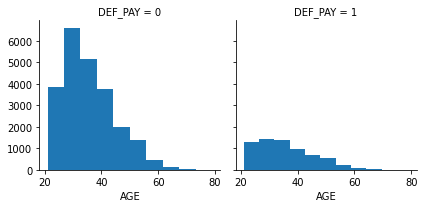

In [88]:
g = sns.FacetGrid(df, col = 'DEF_PAY')
g.map(plt.hist, 'AGE')

##### Vemos clientes que pagaron más de lo que se les pidió, por eso la factura negativa en septiembre, y para colmos  tienen un mes de retraso e incluso incumplieron el mes siguiente. 

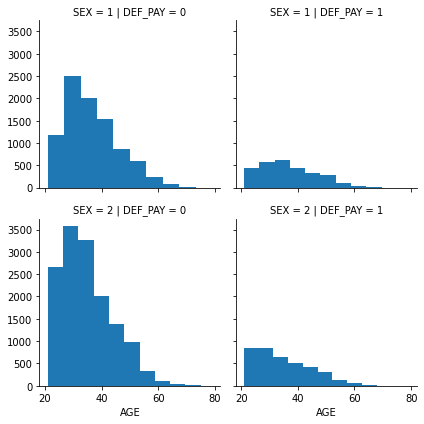

In [89]:
g = sns.FacetGrid(df, col = 'DEF_PAY', row = 'SEX')
g.map(plt.hist, 'AGE')

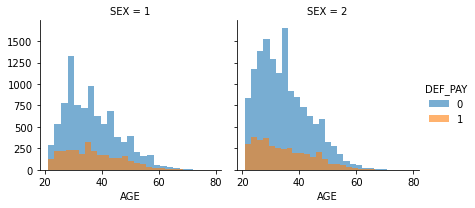

In [90]:
g = sns.FacetGrid(df, col='SEX', hue='DEF_PAY')
g.map(plt.hist, 'AGE', alpha=0.6, bins=25) #alpha is for opacity
g.add_legend()

##### Esto me dice que probablemente pueda combinar la edad con otras categorías para obtener una característica más descriptiva

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 26 columns):
ID           30000 non-null int64
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_1        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
DEF_PAY      30000 non-null int64
SE_MA        30000 non-null int64
dtypes:

In [95]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEF_PAY,SE_MA
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.842267,1.557267,35.485500,0.356767,0.320033,0.304067,0.258767,...,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200,2.490167
std,8660.398374,129747.661567,0.489129,0.744494,0.521405,9.217904,0.760594,0.801727,0.790589,0.761113,...,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062,1.147235
min,1.000000,10000.000000,1.000000,1.000000,1.000000,21.000000,0.000000,0.000000,0.000000,0.000000,...,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,0.000000,0.000000,...,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000,2.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000,2.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000,4.000000
max,30000.000000,1000000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000,6.000000


### Seleccione la variable dependiente

In [96]:
y = df['DEF_PAY'].copy()
y.sample(5)

26022    0
21899    1
5039     1
13770    0
7914     0
Name: DEF_PAY, dtype: int64

### Seleccione las características

In [97]:
features = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
X = df[features].copy()
X.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

### Conjunto de entrenamiento y prueba para las variables 'X' & 'Y'

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [108]:
X_train_count = len(X_train.index)
X_test_count = len(X_test.index)
print('The number of observations in the X training set are:',str(X_train_count),'and X test are:',str(X_test_count))

The number of observations in the X training set are: 21000 and X test are: 9000


In [109]:
y_train_count = len(y_train.index)
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:',str(y_train_count),'and Y test are:',str(y_test_count))

The number of observations in the Y training set are: 21000 and Y test are: 9000


### Validación cruzada

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)
X_train.shape, X_test.shape

((15750, 23), (5250, 23))

### Establezca variables que usará para definir cada modelo

In [117]:
modelSVR = SVR()
modelRF = RandomForestRegressor()
modelLR = LinearRegression()

### Utilice las variables de modelo que estableció y transfiérales los datos de entrenamiento¶

#### Random Forest

In [119]:
modelRF.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

#### Support Vector Regression

In [120]:
modelSVR.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

#### Linear Regression

In [122]:
modelLR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Para cada modelo entrenado y los conjuntos de entrenamiento obtener el puntaje de entrenamiento

#### Random Forest

In [123]:
print(cross_val_score(modelRF, X_train, y_train)) 

[0.19473739 0.19259988 0.17956607 0.19245379 0.21753387]


#### Support Vector Regression

In [124]:
print(cross_val_score(modelSVR, X_train, y_train))

[-0.09174579 -0.07734463 -0.09552714 -0.08649338 -0.07519409]


#### Linear Regression

In [125]:
print(cross_val_score(modelLR, X_train, y_train))

[0.1808545  0.18734423 0.16291085 0.18870345 0.21369426]


In [126]:
modelRF.score(X_train,y_train)

0.8871920428759232

In [127]:
modelSVR.score(X_train,y_train)

-0.07717545609000087

In [128]:
modelLR.score(X_train,y_train)

0.1897311130902355

### Ajuste y puntuación del modelo de regresión forestal aleatoria

In [129]:
#Model Fitting
modelRF.fit(X_train,y_train)
print(cross_val_score(modelRF, X_train, y_train))
modelRF.score(X_train,y_train)

[0.18998292 0.19605882 0.18831086 0.18638332 0.21448829]


0.886390764054136

### Ajuste y puntuación del modelo de regresión vectorial

In [130]:
modelSVR.fit(X_train,y_train)
print(cross_val_score(modelSVR, X_train, y_train)) 
modelSVR.score(X_train,y_train)

[-0.09174579 -0.07734463 -0.09552714 -0.08649338 -0.07519409]


-0.07717545609000087

### Ajuste y puntuación del modelo de regresión lineal

In [131]:
modelLR.fit(X_train,y_train)
print(cross_val_score(modelLR, X_train, y_train)) 
modelLR.score(X_train,y_train)

[0.1808545  0.18734423 0.16291085 0.18870345 0.21369426]


0.1897311130902355

## Hacer predicciones y evaluar los resultados con el modelo seleccionado

### Haciendo predicciones

In [132]:
predictions = modelRF.predict(X_test)

### Evaluando los resultados

#### Calcular RMSE

In [133]:
rmse = sqrt(mean_squared_error(y_test, predictions))

#### Calcular R Cuadrado

In [134]:
predRsquared = r2_score(y_test,predictions)

In [135]:
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.184
RMSE: 0.379


### Trazando los resultados

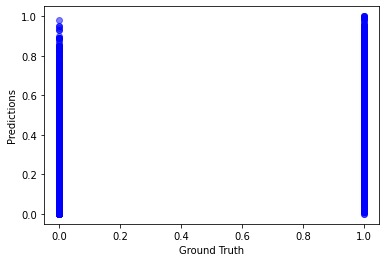

In [137]:
plt.scatter(y_test, predictions, color=['blue'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

In [138]:
predictions

array([0.25, 0.81, 0.25, ..., 0.31, 0.03, 0.55])